In [1]:
import random
c=[1,2,3]
random.shuffle(c)
c

[3, 1, 2]

In [6]:
import os
import sys
sys.path.append(os.path.abspath('/../..'))
import json
import math
import unittest
import deepdish
import numpy as np
import pandas as pd
import deepdish as dd
import math
from time import gmtime, strftime
from os.path import abspath, expanduser
from sequence_annotation.genome_handler.ann_genome_creator import AnnChromCreator, AnnGenomeCreator
from sequence_annotation.genome_handler.seq_container import SeqInfoContainer, AnnSeqContainer
from sequence_annotation.genome_handler.ann_seq_extractor import AnnSeqExtractor
from sequence_annotation.genome_handler.sequence import SeqInformation,AnnSequence
from sequence_annotation.genome_handler.ann_seq_converter import GeneticBedSeqConverter
from sequence_annotation.genome_handler.seq_info_parser import BedInfoParser
from sequence_annotation.genome_handler import ann_seq_processor
from sequence_annotation.genome_handler import ann_genome_processor
from sequence_annotation.visual.visual import visual_ann_seqs,visual_ann_seq

In [7]:
fai = pd.read_csv('gene_info/data/araport_11_Arabidopsis_thaliana_Col-0_rename.fasta.fai',sep='\t',header=None).to_dict('record')
infos = {}
for info in fai:
    infos[info[0]]=info[1]
genome_info={'chromosome':infos,'source':"Araport11"}

In [9]:
data = pd.read_csv('gene_info/data/2018_11_27/Araport11_exon_2018_11_27_merged_with_coordinate_file_megred_exon.bed',header=None,sep='\t').to_dict('record')
parsed = BedInfoParser().parse(data)

In [10]:
converter = GeneticBedSeqConverter()
ann_seqs = AnnSeqContainer()
ann_seqs.ANN_TYPES = converter.ANN_TYPES
for item in parsed:
    ann_seqs.add(GeneticBedSeqConverter().convert(item))

In [11]:
wanted_region = pd.read_csv('gene_info/data/2018_11_27/Araport11_exon_2018_11_27_merged_with_coordinate_file_megred_exon_dist_to_five_1000_dist_to_three_500_merged.bed',header=None,sep='\t')
wanted_region = wanted_region.rename(columns = {0:'chr',1:'start',2:'end',3:'id',4:'score',5:'strand'})
wanted_region['end'] = wanted_region['end'] - 1

In [12]:
wanted_region.loc[wanted_region['strand']=='+','strand']='plus'
wanted_region.loc[wanted_region['strand']=='-','strand']='minus'

In [13]:
seq_infos = SeqInfoContainer()
for item in wanted_region.to_dict('record'):
    seq_info = SeqInformation()
    seq_info.chromosome_id=item['chr']
    seq_info.id=item['id']
    seq_info.strand=item['strand']
    seq_info.start=item['start']
    seq_info.end=item['end']
    seq_infos.add(seq_info)

In [14]:
ann_genome_creator = AnnGenomeCreator()
genome=ann_genome_creator.create(ann_seqs,genome_info)
extracted_seqs = AnnSeqExtractor().extract(genome,seq_infos)
backgrounded_extracted_seqs = ann_genome_processor.get_backgrounded_genome(extracted_seqs,'other')
mixed_type_backgrounded_extracted_seqs = ann_genome_processor.mixed_typed_genome_generate(backgrounded_extracted_seqs)

/home/sequence_annotation/sequence_annotation/genome_handler/ann_genome_creator.py:11: UserWarning: 
!!!
	Coordinate will be 5' to 3' of plus strand on both PLUS and MINUS strand'
!!!

  " on both PLUS and MINUS strand'\n!!!\n"), UserWarning)
/home/sequence_annotation/sequence_annotation/genome_handler/ann_seq_processor.py:208: RuntimeWarning: invalid value encountered in true_divide
  vecs.append(np.nan_to_num(temp/temp))


In [15]:
dd.io.save('Araport11_exon_2018_11_27_merged_with_coordinate_file_megred_exon_dist_to_five_1000_dist_to_three_500_merged.h5',mixed_type_backgrounded_extracted_seqs.to_dict())

In [16]:
for seq in mixed_type_backgrounded_extracted_seqs:
    if seq.length>10000:
        print(seq.id)

AT1G01320.1
AT1G02880.5,AT1G02890.1,AT1G02890.2
AT1G02990.1,AT1G02990.2,AT1G02990.4,AT1G02990.5,AT1G03000.1
AT1G08600.3
AT1G08890.1,AT1G08900.1,AT1G08900.2,AT1G08900.3,AT1G08900.4,AT1G08900.5,AT1G08910.1
AT1G10760.1
AT1G20950.1,AT1G20960.1,AT1G20960.2
AT1G30680.1,AT1G30690.1,AT1G30690.2
AT1G32070.1,AT1G32070.2,AT1G32070.3,AT1G32080.1,AT1G32090.1
AT1G49340.2,AT1G49340.4,AT1G49350.1
AT1G58602.2
AT1G70320.1
AT1G80410.1,AT1G80410.2,AT1G80420.4
AT2G07360.1,AT2G07360.2
AT2G13370.3
AT2G17930.1
AT2G26890.1,AT2G26900.1
AT2G26910.1,AT2G26920.1
AT2G32530.1,AT2G32540.1
AT2G34680.1,AT2G34680.2
AT2G36380.1,AT2G36390.1
AT3G04490.1,AT3G04490.3,AT3G04490.4
AT3G11910.1
AT3G13330.1
AT3G13860.1,AT3G13870.1,AT3G13870.2
AT3G19720.3,AT3G19740.1
AT3G54220.1,AT3G54230.2
AT3G56020.1,AT3G56040.1,AT3G56050.1
AT4G03550.1,AT4G03560.1
AT4G15180.1
AT4G32960.1,AT4G32970.1,AT4G32980.1,AT4G32980.2
AT4G39850.1,AT4G39850.2,AT4G39850.3,AT4G39850.4
AT5G06600.1,AT5G06600.2
AT5G10940.1,AT5G10940.2,AT5G10946.1,AT5G10946.2
AT5G

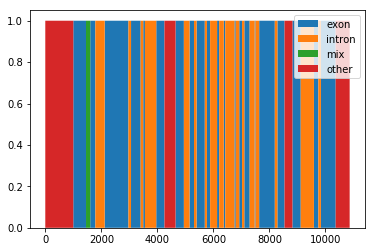

In [22]:
visual_ann_seq(mixed_type_backgrounded_extracted_seqs.get('AT4G32960.1,AT4G32970.1,AT4G32980.1,AT4G32980.2'))

In [ ]:
lens = [len(seq)-1500 for seq in mixed_type_backgrounded_extracted_seqs]
from matplotlib import pyplot as plt
plt.hist(lens,bins=100,log=True)
plt.show()